In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Bandit:
    def __init__(self,m,name, upper_limit):
        self.m = m #True mean of the return
        self.N = 1
        self.mean = upper_limit #Initial optimistic value
        self.name = name
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self,x):
        self.N += 1 
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x  

In [8]:
def run_exp(m1_mean,m2_mean,m3_mean,N):
    
    #Create Bandits with given mean
    m1 = Bandit(m1_mean,"m1",10)
    m2 = Bandit(m2_mean,"m2",10)
    m3 = Bandit(m3_mean,"m3",10)
    
    bandits = [m1,m2,m3]
    data = np.empty(N)
    cum_reward = 0.0 
    for i in range(N):
        #Always chose the one that has max reward
        idx = np.argmax([b.mean for b in bandits])
        
        reward = bandits[idx].pull()
        bandits[idx].update(reward)
        data[i] = reward
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1_mean)
    plt.plot(np.ones(N)*m2_mean)
    plt.plot(np.ones(N)*m3_mean)
    plt.xscale('log')
    plt.show()
    for b in bandits:
        print(b.name, b.mean)

    return cumulative_average

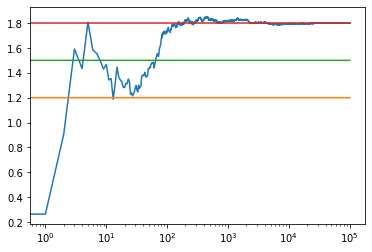

m1 1.7564951203826582
m2 1.7240895989170237
m3 1.8011800891343568


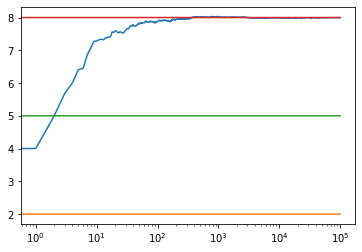

m1 6.238694088596841
m2 7.763253748245667
m3 7.996067462899364


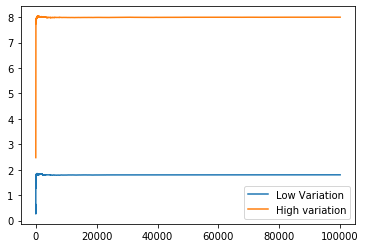

In [9]:
if __name__ == '__main__':
    c_1 = run_exp(1.2, 1.5, 1.8, 100000)
    c_05 = run_exp(2, 5, 8, 100000)
#    c_01 = run_exp(1.2, 1.5, 1.8, 100000)
    # linear plot
    plt.plot(c_1, label="Low Variation")
    plt.plot(c_05, label='High variation')
#   plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()